In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


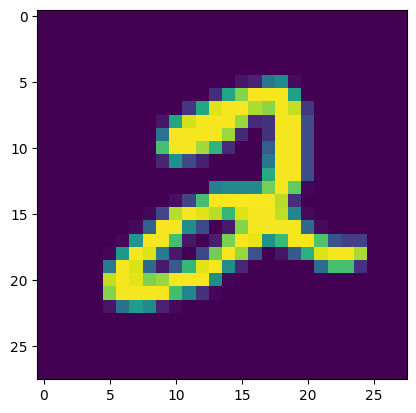

label:  2


In [ ]:
(X_train , y_train),(X_test , y_test) = mnist.load_data()
plt.imshow(X_train[5])
plt.show()
print('label: ',y_train[5])

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
#preprocess x data
X_train = X_train.reshape((X_train.shape[0] , -1))
X_test = X_test.reshape((X_test.shape[0] , -1))

In [ ]:
X_train, _ , y_train, _ = train_test_split(X_train,y_train,test_size=0.67,random_state = 7)

In [ ]:
#preporcess Y data
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [ ]:
#basic MLP model using keras
#naive mlp model
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [ ]:
model = Sequential()
model.add(Dense(50,input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras import optimizers
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

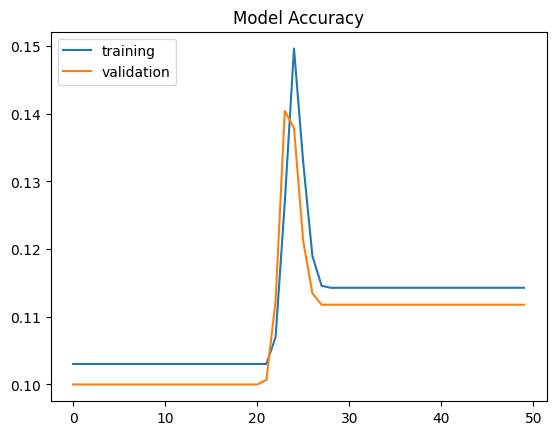

In [ ]:
history = model.fit(X_train, y_train, batch_size=350, validation_split=0.3, epochs=50, verbose=0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Model Accuracy')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.1160 - loss: 2.2985


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.11349999904632568


In [ ]:
#Vanishing gradient problem
#weight initialization using He_Normal Initializer

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras import optimizers

def mlp_model():
    model = Sequential()
    model.add(Input(shape=(784,)))
    model.add(Dense(50, kernel_initializer='he_normal', activation='sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation='sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation='sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    return model


model = mlp_model()
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=0)

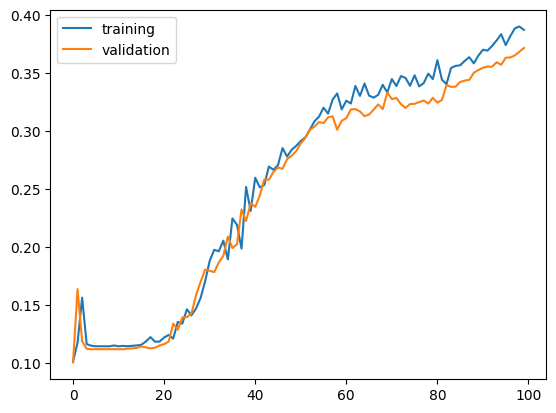

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.3722 - loss: 1.9475


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.3871000111103058


In [ ]:
#Activation function - ReLU
from keras.models import Sequential
from keras.layers import Input, Dense,Activation
from keras import optimizers
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784, )))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(learning_rate = 0.001)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy',metrics = ['acc'])
  return model


In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split=0.3,epochs = 100, verbose = 0)

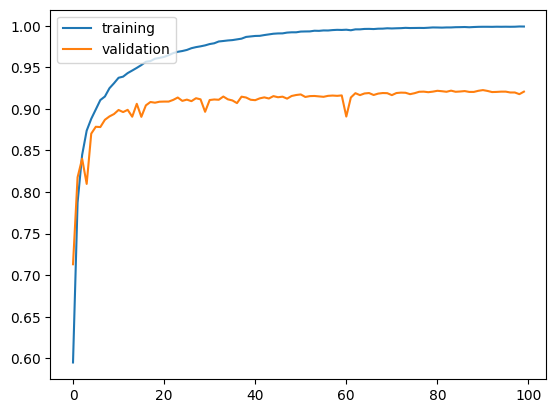

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9118 - loss: 0.5608


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.9218999743461609


In [ ]:
#using adam optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import optimizers
def mlp_model():
  model = Sequential()

  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(learning_rate = 0.001)
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['acc'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


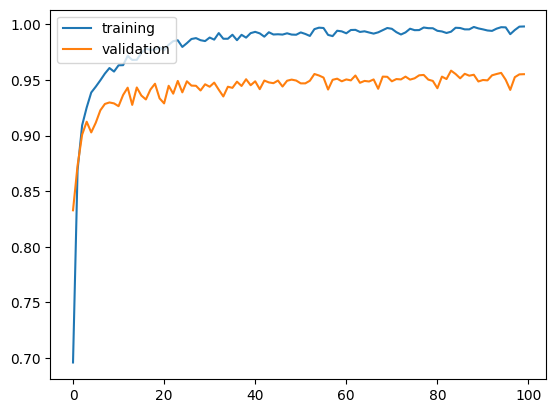

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9501 - loss: 0.5349


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.9575999975204468


In [ ]:
#batch mornalization

In [ ]:
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import optimizers

In [ ]:
def mlp_model():
  model = Sequential()
  model.add(Dense(50, input_shape = (784, )))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(learning_rate = 0.001)
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['acc'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split= 0.3, epochs = 100, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


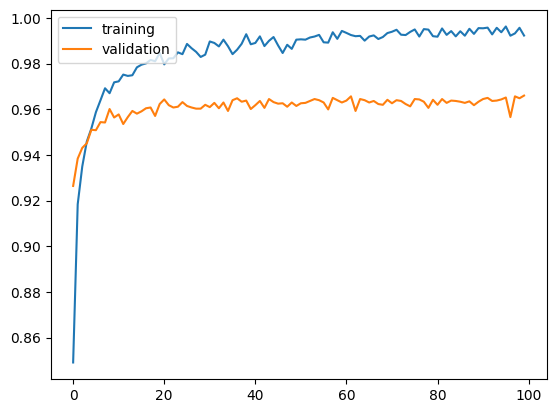

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9570 - loss: 0.2185


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.9646999835968018


In [ ]:
#dropout regularization

In [ ]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import optimizers

In [ ]:
def mlp_model():
  model = Sequential()

  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('elu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(Activation('elu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(learning_rate = 0.001)
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['acc'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.1094 - loss: 10.5645 - val_acc: 0.2081 - val_loss: 2.0713
Epoch 2/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.1801 - loss: 2.1910 - val_acc: 0.2172 - val_loss: 1.9958
Epoch 3/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.2126 - loss: 2.0840 - val_acc: 0.2855 - val_loss: 1.8418
Epoch 4/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.2647 - loss: 1.9496 - val_acc: 0.3141 - val_loss: 1.7315
Epoch 5/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3045 - loss: 1.8152 - val_acc: 0.3557 - val_loss: 1.6379
Epoch 6/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3303 - loss: 1.7417 - val_acc: 0.4002 - val_loss: 1.5230
Epoch 7/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3576 - loss: 1.6641 - val_acc: 0.3995 - val_loss: 1.4932
Epoch 8/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3660 - loss: 1.6115 - val_acc: 0.4397 - val_loss: 1.3620
Epoch 9/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms

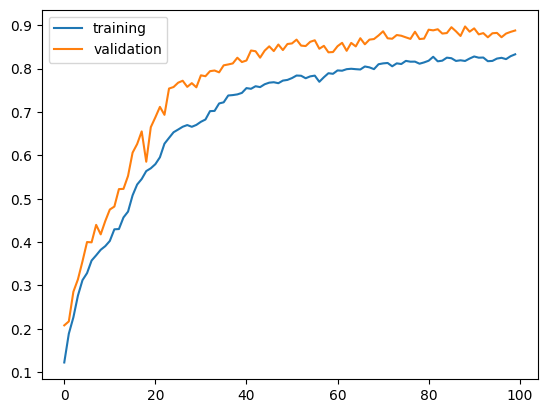

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8689 - loss: 0.4897


In [ ]:
print('test accuracy: ',results[1])

test accuracy:  0.8885999917984009
